In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
emission_data = pd.read_csv('emissions_medium_granularity.csv')

In [6]:
emission_data.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [7]:
emission_data.columns

Index(['year', 'parent_entity', 'parent_type', 'commodity', 'production_value',
       'production_unit', 'total_emissions_MtCO2e'],
      dtype='object')

In [8]:
emission_data.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.677443,113.205850
std,29.202455,1357.538128,329.789848
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949


In [9]:
emission_data.dtypes

year                        int64
parent_entity              object
parent_type                object
commodity                  object
production_value          float64
production_unit            object
total_emissions_MtCO2e    float64
dtype: object

In [10]:
emission_data['year'].value_counts()

year
2021    238
2022    238
2018    237
2019    236
2020    235
       ... 
1858      3
1857      3
1856      3
1854      3
1863      3
Name: count, Length: 169, dtype: int64

In [11]:
emission_data['parent_entity'].value_counts()

parent_entity
Westmoreland Mining                   507
Former Soviet Union                   456
Poland                                416
China (Coal)                          312
Singareni Collieries                  304
                                     ... 
CNX Resources                          12
Adani Enterprises                      11
Cloud Peak                             11
Navajo Transitional Energy Company      8
Seriti Resources                        5
Name: count, Length: 122, dtype: int64

In [12]:
emission_data['parent_type'].value_counts()

parent_type
Investor-owned Company    6583
State-owned Entity        3914
Nation State              2054
Name: count, dtype: int64

In [13]:
emission_data['commodity'].value_counts()

commodity
Oil & NGL              3733
Natural Gas            3452
Bituminous Coal        1370
Metallurgical Coal     1073
Lignite Coal           1008
Sub-Bituminous Coal     673
Thermal Coal            611
Anthracite Coal         368
Cement                  263
Name: count, dtype: int64

In [14]:
emission_data['production_unit'].value_counts()

production_unit
Million tonnes/yr     5103
Million bbl/yr        3733
Bcf/yr                3452
Million Tonnes CO2     263
Name: count, dtype: int64

In [15]:
emission_data.isnull().sum()

year                      0
parent_entity             0
parent_type               0
commodity                 0
production_value          0
production_unit           0
total_emissions_MtCO2e    0
dtype: int64

In [16]:
emission_data

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079
...,...,...,...,...,...,...,...
12546,2020,YPF,State-owned Entity,Natural Gas,394.00000,Bcf/yr,28.718814
12547,2021,YPF,State-owned Entity,Oil & NGL,90.00000,Million bbl/yr,35.890011
12548,2021,YPF,State-owned Entity,Natural Gas,403.00000,Bcf/yr,29.374827
12549,2022,YPF,State-owned Entity,Oil & NGL,98.00000,Million bbl/yr,39.080234


## Emissions trend by Year

In [20]:
emission_by_year = emission_data.groupby('year')['total_emissions_MtCO2e'].sum().reset_index()

In [21]:
emission_by_year

,year,total_emissions_MtCO2e
0,1854,0.099198
1,1855,0.128996
2,1856,0.158793
3,1857,0.184580
4,1858,0.210367
...,...,...
164,2018,35731.881967
165,2019,36397.644590
166,2020,34926.134998
167,2021,36125.590504


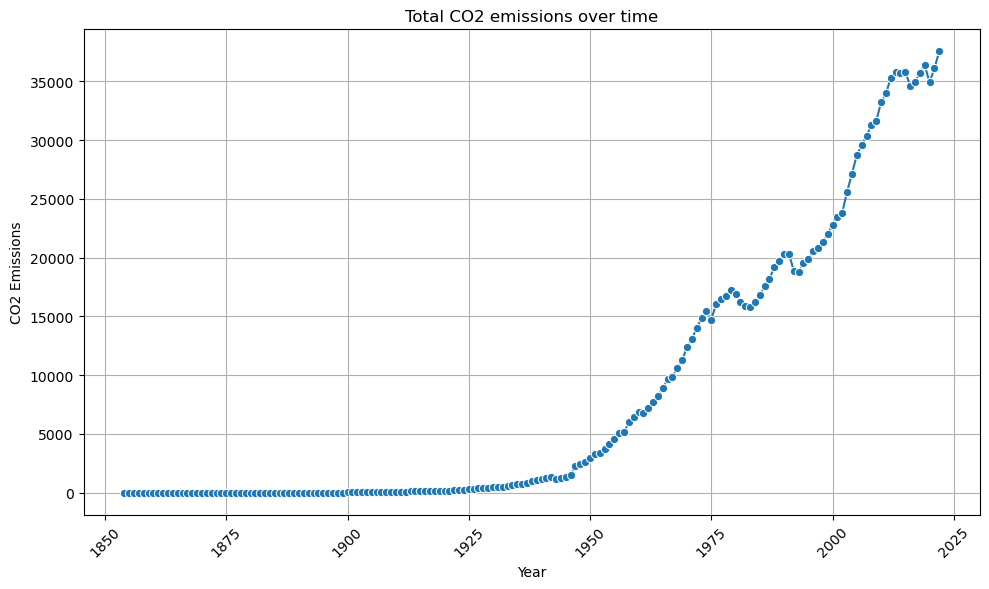

In [24]:
plt.figure(figsize = (10,6))
sns.lineplot(x='year', y='total_emissions_MtCO2e', data=emission_by_year, marker='o')

plt.title('Total CO2 emissions over time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
emission_by_year.describe()

,year,total_emissions_MtCO2e
count,169.000000,169.000000
mean,1938.000000,8407.376499
std,48.930222,11556.332749
min,1854.000000,0.099198
25%,1896.000000,9.706660
50%,1938.000000,965.489644
75%,1980.000000,16208.042783
max,2022.000000,37559.204268


## Tracking YoY change

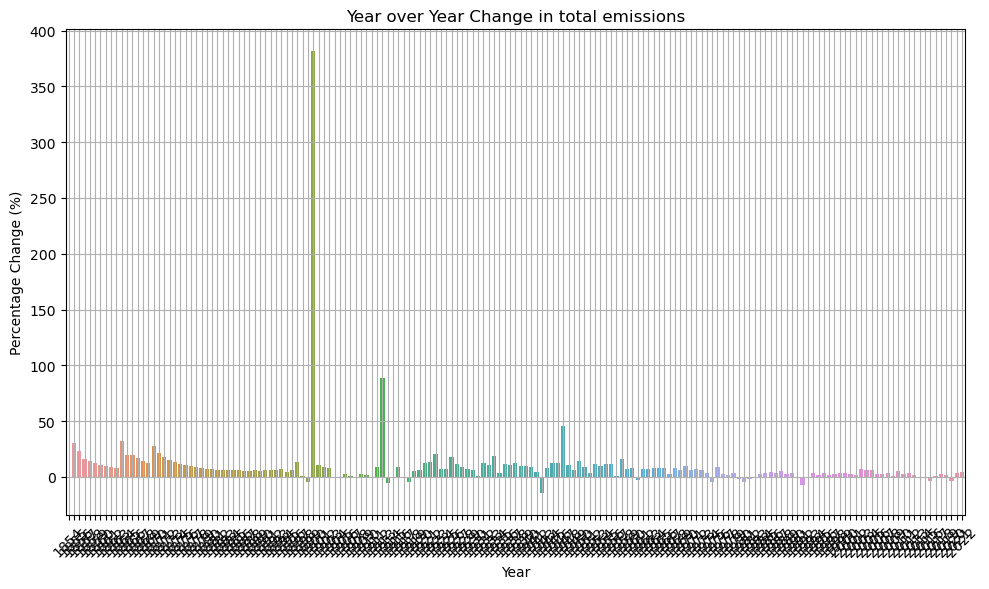

In [27]:
emission_by_year['pct_change'] = emission_by_year['total_emissions_MtCO2e'].pct_change() * 100

plt.figure(figsize=(10,6))
sns.barplot(x='year', y='pct_change', data=emission_by_year)
plt.title('Year over Year Change in total emissions')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
emission_by_year.sort_values(by='pct_change', ascending=False)

,year,total_emissions_MtCO2e,pct_change
46,1900,51.340591,381.365776
59,1913,144.257336,88.640131
93,1947,2240.778259,45.863314
10,1864,0.447921,32.012644
1,1855,0.128996,30.038418
...,...,...,...
121,1975,14719.806483,-4.793030
60,1914,136.371667,-5.466391
138,1992,18903.834995,-7.073679
89,1943,1128.246740,-14.173018


## Emissions by Entity

In [39]:
emission_by_entity = emission_data.groupby('parent_entity')['total_emissions_MtCO2e'].sum().reset_index()

In [41]:
if not isinstance(emission_by_entity, pd.DataFrame):
    emission_by_entity = pd.DataFrame(emission_by_entity)

# Display the DataFrame
print(emission_by_entity)

                      parent_entity  total_emissions_MtCO2e
0                   APA Corporation             1963.916324
1    Abu Dhabi National Oil Company            17383.178178
2                 Adani Enterprises              316.050246
3                      Adaro Energy             2068.445847
4        Alliance Resource Partners             1777.070790
..                              ...                     ...
117             Westmoreland Mining             2339.073216
118                 Whitehaven Coal              428.392376
119                 Wolverine Fuels              384.717350
120                 Woodside Energy              918.253427
121                             YPF             2038.976078

[122 rows x 2 columns]


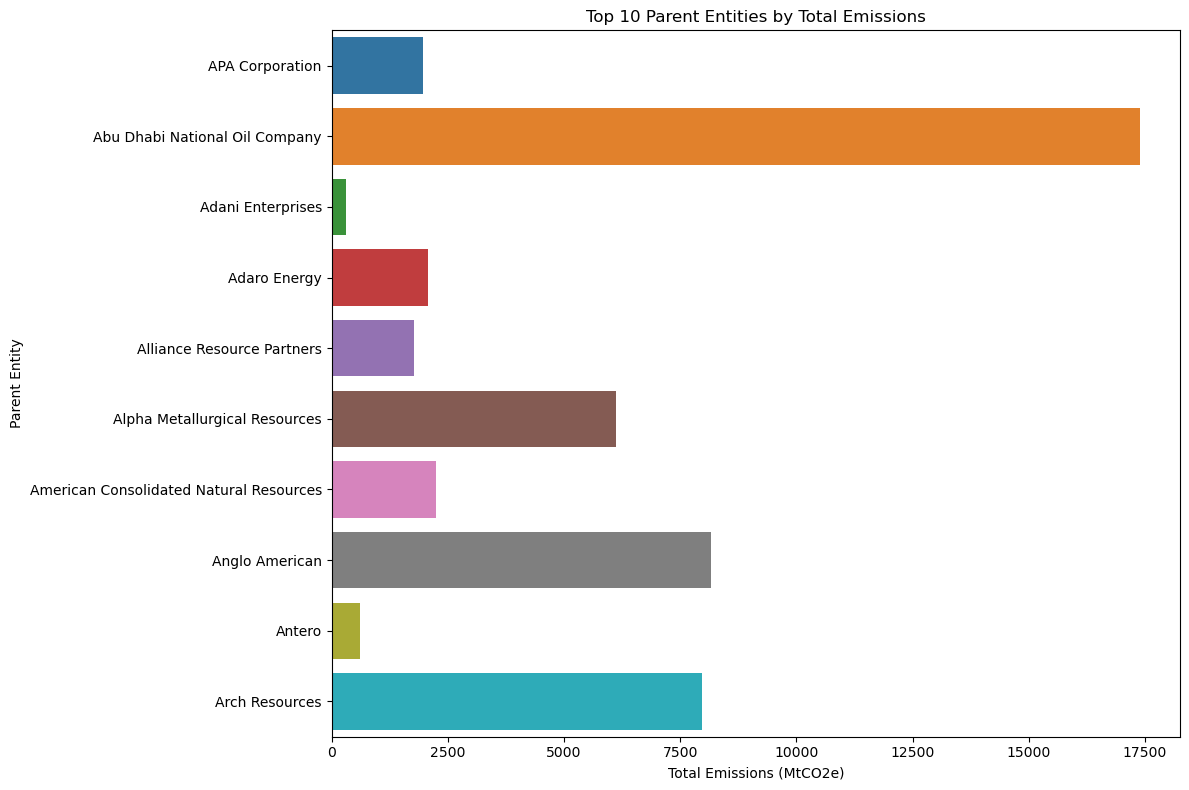

In [42]:
plt.figure(figsize=(12, 8))
top_n = 10
sns.barplot(x='total_emissions_MtCO2e', y='parent_entity', data=emission_by_entity.head(top_n))
plt.title(f'Top {top_n} Parent Entities by Total Emissions')
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Parent Entity')
plt.tight_layout()
plt.show()

In [45]:
top_contributors = emission_by_entity.head(top_n)
print(top_contributors)

                             parent_entity  total_emissions_MtCO2e
0                          APA Corporation             1963.916324
1           Abu Dhabi National Oil Company            17383.178178
2                        Adani Enterprises              316.050246
3                             Adaro Energy             2068.445847
4               Alliance Resource Partners             1777.070790
5            Alpha Metallurgical Resources             6127.223361
6  American Consolidated Natural Resources             2239.722397
7                           Anglo American             8162.762852
8                                   Antero              606.199783
9                           Arch Resources             7969.293203


In [46]:
emission_data

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079
...,...,...,...,...,...,...,...
12546,2020,YPF,State-owned Entity,Natural Gas,394.00000,Bcf/yr,28.718814
12547,2021,YPF,State-owned Entity,Oil & NGL,90.00000,Million bbl/yr,35.890011
12548,2021,YPF,State-owned Entity,Natural Gas,403.00000,Bcf/yr,29.374827
12549,2022,YPF,State-owned Entity,Oil & NGL,98.00000,Million bbl/yr,39.080234


## Emissions by commodity

In [47]:
emission_by_commodity = emission_data.groupby('commodity')['total_emissions_MtCO2e'].sum().reset_index()

In [49]:
emission_by_commodity = emission_by_commodity.sort_values(by='total_emissions_MtCO2e', ascending=False)

In [50]:
emission_by_commodity

,commodity,total_emissions_MtCO2e
6,Oil & NGL,527968.651582
1,Bituminous Coal,330765.390936
5,Natural Gas,259155.014854
4,Metallurgical Coal,87560.209937
7,Sub-Bituminous Coal,49794.041473
0,Anthracite Coal,47496.209235
8,Thermal Coal,45733.579536
3,Lignite Coal,42691.550105
2,Cement,29681.980604


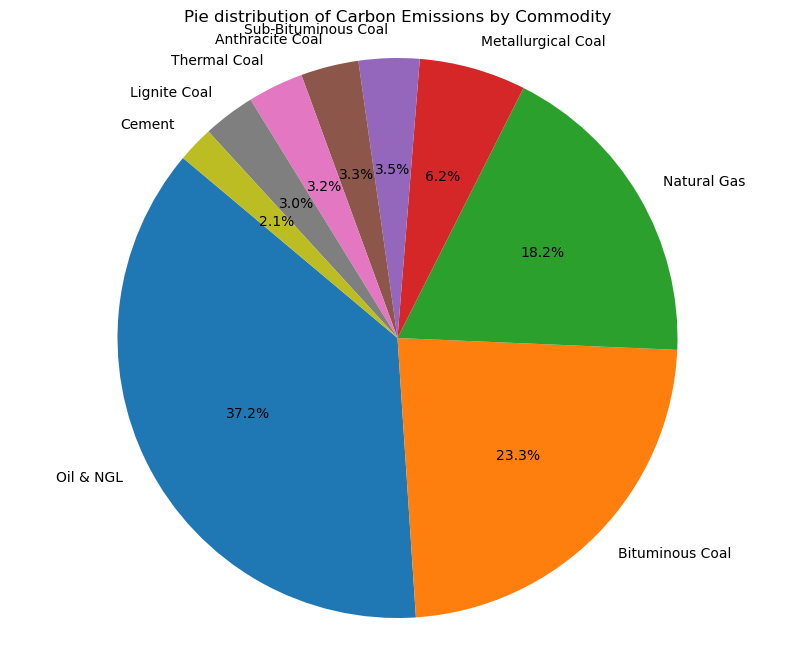

In [54]:
plt.figure(figsize=(10,8))
plt.title('Pie distribution of Carbon Emissions by Commodity')

plt.pie(emission_by_commodity['total_emissions_MtCO2e'], labels=emission_by_commodity['commodity'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

## Emission Intensity (emissions per unit production)

In [55]:
emission_data['production_unit'].value_counts()

production_unit
Million tonnes/yr     5103
Million bbl/yr        3733
Bcf/yr                3452
Million Tonnes CO2     263
Name: count, dtype: int64

In [56]:
unit_conversion = {
    'Million tonnes/yr': 1e6,
    'Million bbl/yr': 6.29e7,
    'Bcf/yr': 1.116e10,
    'Million Tonnes CO2': 1e6
}

emission_data['normalized_production_value'] = emission_data.apply(lambda row: row['production_value'] * unit_conversion[row['production_unit']], axis=1)

In [58]:
emission_data

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e,normalized_production_value
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885,5.739625e+07
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355,2.057067e+10
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770,1.147925e+08
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453,4.936961e+10
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079,4.591700e+08
...,...,...,...,...,...,...,...,...
12546,2020,YPF,State-owned Entity,Natural Gas,394.00000,Bcf/yr,28.718814,4.397040e+12
12547,2021,YPF,State-owned Entity,Oil & NGL,90.00000,Million bbl/yr,35.890011,5.661000e+09
12548,2021,YPF,State-owned Entity,Natural Gas,403.00000,Bcf/yr,29.374827,4.497480e+12
12549,2022,YPF,State-owned Entity,Oil & NGL,98.00000,Million bbl/yr,39.080234,6.164200e+09


In [59]:
emission_data['emission_intensity'] = emission_data['total_emissions_MtCO2e'] / emission_data['normalized_production_value']

In [60]:
emission_data

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e,normalized_production_value,emission_intensity
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885,5.739625e+07,6.339871e-09
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355,2.057067e+10,6.531397e-12
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770,1.147925e+08,6.339871e-09
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453,4.936961e+10,6.531397e-12
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079,4.591700e+08,6.339871e-09
...,...,...,...,...,...,...,...,...,...
12546,2020,YPF,State-owned Entity,Natural Gas,394.00000,Bcf/yr,28.718814,4.397040e+12,6.531397e-12
12547,2021,YPF,State-owned Entity,Oil & NGL,90.00000,Million bbl/yr,35.890011,5.661000e+09,6.339871e-09
12548,2021,YPF,State-owned Entity,Natural Gas,403.00000,Bcf/yr,29.374827,4.497480e+12,6.531397e-12
12549,2022,YPF,State-owned Entity,Oil & NGL,98.00000,Million bbl/yr,39.080234,6.164200e+09,6.339871e-09


In [61]:
emission_intensity_commodity = emission_data.groupby('commodity')['emission_intensity'].mean().reset_index()

In [64]:
emission_intensity_commodity = emission_intensity_commodity.sort_values(by='emission_intensity', ascending=False)

In [65]:
emission_intensity_commodity

,commodity,emission_intensity
4,Metallurgical Coal,2.966617e-06
0,Anthracite Coal,2.917687e-06
1,Bituminous Coal,2.714139e-06
8,Thermal Coal,2.369428e-06
7,Sub-Bituminous Coal,2.019090e-06
3,Lignite Coal,1.339210e-06
2,Cement,5.841776e-07
6,Oil & NGL,6.339871e-09
5,Natural Gas,6.531397e-12


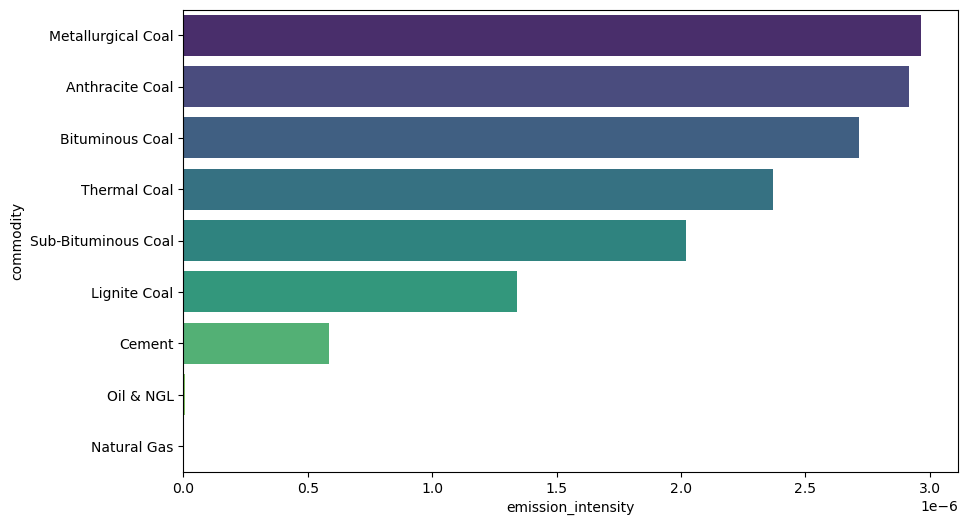

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x='emission_intensity', y='commodity', data=emission_intensity_commodity, palette='viridis')

plt.show()

## Which parent entitities have the lowest emission intensity

In [69]:
lowest_emission_entity_commodity = emission_data.groupby('parent_entity')['emission_intensity'].mean().reset_index()

In [71]:
lowest_emission_entity_commodity = lowest_emission_entity_commodity.sort_values(by='emission_intensity', ascending=True)

In [72]:
lowest_emission_entity_commodity

,parent_entity,emission_intensity
39,EQT Corporation,2.071751e-09
120,Woodside Energy,2.720820e-09
103,Southwestern Energy,3.173201e-09
25,Chesapeake Energy,3.173201e-09
42,Eni,3.173201e-09
...,...,...
113,UK Coal,2.714139e-06
15,British Coal Corporation,2.714139e-06
119,Wolverine Fuels,2.714139e-06
6,American Consolidated Natural Resources,2.714139e-06


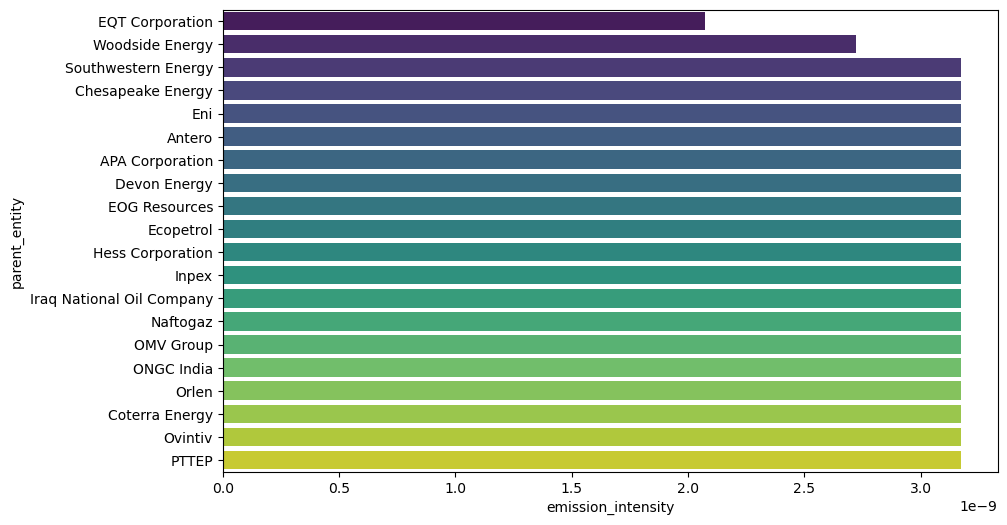

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x='emission_intensity', y='parent_entity', data=lowest_emission_entity_commodity.head(20), palette='viridis')
plt.show()

## Production value and emissions relation

In [76]:
emission_data[['production_value', 'total_emissions_MtCO2e']].describe()

,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000
mean,412.677443,113.205850
std,1357.538128,329.789848
min,0.004398,0.000321
25%,10.601353,8.785294
50%,63.203536,33.058688
75%,320.664764,102.154596
max,27192.000000,8646.905949


In [77]:
emission_data[['production_value', 'total_emissions_MtCO2e']].corr()

,production_value,total_emissions_MtCO2e
production_value,1.000000,0.403559
total_emissions_MtCO2e,0.403559,1.000000


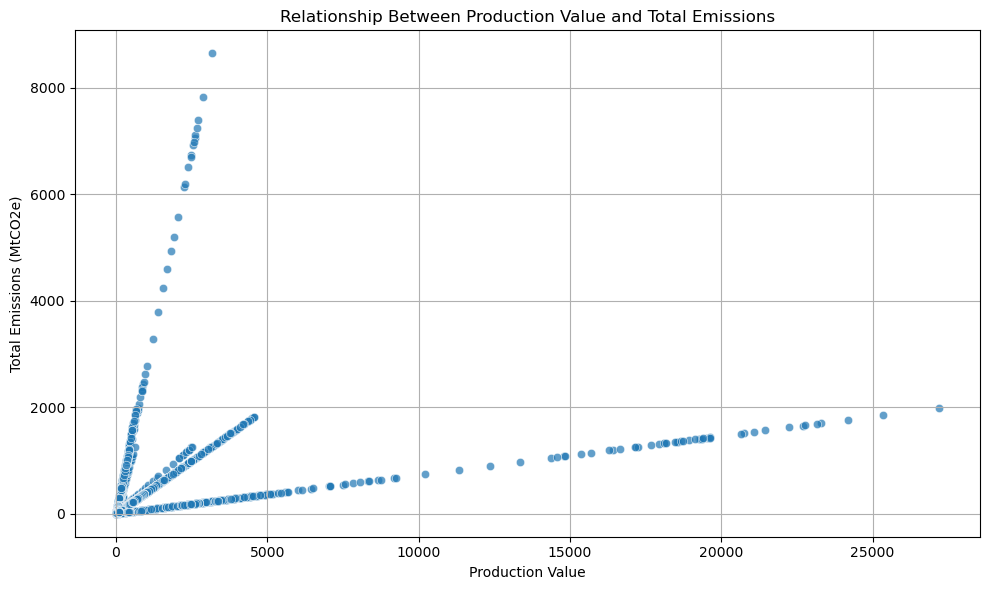

In [79]:
# Step 2: Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_value', y='total_emissions_MtCO2e', data=emission_data, alpha=0.7)
plt.title('Relationship Between Production Value and Total Emissions')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Parent Type vs Total Emissions

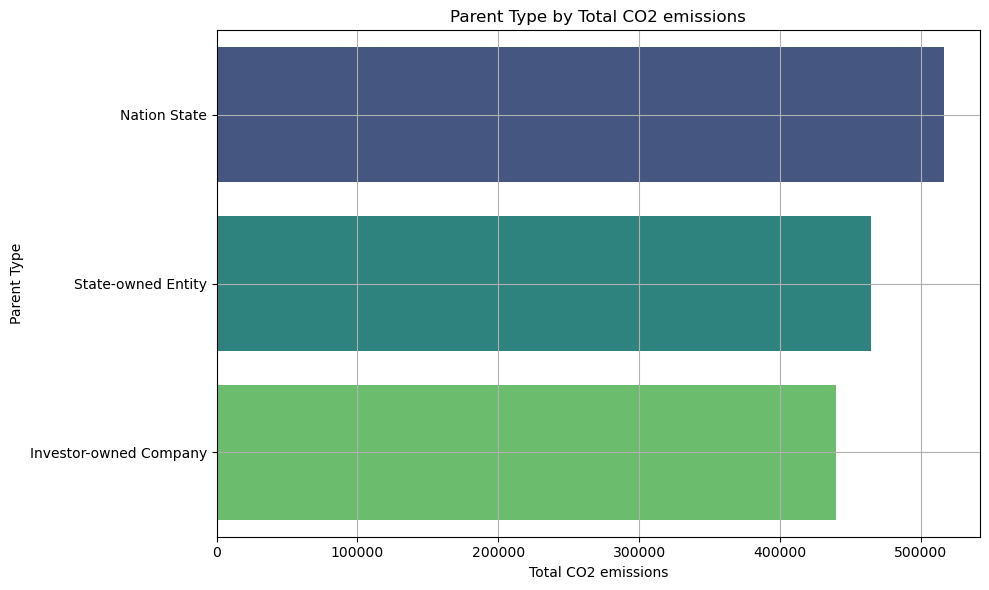

In [81]:
emission_by_parent_type = emission_data.groupby('parent_type')['total_emissions_MtCO2e'].sum().reset_index()
emission_by_parent_type = emission_by_parent_type.sort_values(by='total_emissions_MtCO2e', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='total_emissions_MtCO2e', y='parent_type', data=emission_by_parent_type, palette='viridis')
plt.title('Parent Type by Total CO2 emissions')
plt.xlabel('Total CO2 emissions')
plt.ylabel('Parent Type')
plt.grid(True)
plt.tight_layout()
plt.show()


## Years with highest and lowest Emissions

In [83]:
emission_by_year

,year,total_emissions_MtCO2e,pct_change
0,1854,0.099198,NaN
1,1855,0.128996,30.038418
2,1856,0.158793,23.099649
3,1857,0.184580,16.239316
4,1858,0.210367,13.970589
...,...,...,...
164,2018,35731.881967,2.158706
165,2019,36397.644590,1.863217
166,2020,34926.134998,-4.042870
167,2021,36125.590504,3.434263


In [86]:
highest_emission_year = emission_by_year.loc[emission_by_year['total_emissions_MtCO2e'].idxmax()]
lowest_emission_year = emission_by_year.loc[emission_by_year['total_emissions_MtCO2e'].idxmin()]

highest_year_data = emission_data[emission_data['year'] == highest_emission_year['year']]
lowest_year_data = emission_data[emission_data['year'] == lowest_emission_year['year']]

# Display a sample of the contributing factors for highest and lowest emission years
print(f"\nSample data for highest emission year ({highest_emission_year['year']}):")
print(highest_year_data.head())
print(f"\nSample data for lowest emission year ({lowest_emission_year['year']}):")
print(lowest_year_data.head())


Sample data for highest emission year (2022.0):
     year                   parent_entity             parent_type  \
120  2022  Abu Dhabi National Oil Company      State-owned Entity   
121  2022  Abu Dhabi National Oil Company      State-owned Entity   
132  2022               Adani Enterprises  Investor-owned Company   
169  2022                    Adaro Energy  Investor-owned Company   
170  2022                    Adaro Energy  Investor-owned Company   

               commodity  production_value    production_unit  \
120            Oil & NGL       1277.500000     Million bbl/yr   
121          Natural Gas       2689.430294             Bcf/yr   
132  Sub-Bituminous Coal         34.900000  Million tonnes/yr   
169  Sub-Bituminous Coal         59.510000  Million tonnes/yr   
170   Metallurgical Coal          3.370000  Million tonnes/yr   

     total_emissions_MtCO2e  normalized_production_value  emission_intensity  
120              509.438763                 8.035475e+10        6.

In [87]:
highest_year_data

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e,normalized_production_value,emission_intensity
120,2022,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1277.500000,Million bbl/yr,509.438763,8.035475e+10,6.339871e-09
121,2022,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,2689.430294,Bcf/yr,196.033624,3.001404e+13,6.531397e-12
132,2022,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,34.900000,Million tonnes/yr,70.466256,3.490000e+07,2.019090e-06
169,2022,Adaro Energy,Investor-owned Company,Sub-Bituminous Coal,59.510000,Million tonnes/yr,120.156072,5.951000e+07,2.019090e-06
170,2022,Adaro Energy,Investor-owned Company,Metallurgical Coal,3.370000,Million tonnes/yr,9.997500,3.370000e+06,2.966617e-06
...,...,...,...,...,...,...,...,...,...
12413,2022,Wolverine Fuels,Investor-owned Company,Bituminous Coal,5.828721,Million tonnes/yr,15.819960,5.828721e+06,2.714139e-06
12503,2022,Woodside Energy,Investor-owned Company,Oil & NGL,44.000000,Million bbl/yr,17.546227,2.767600e+09,6.339871e-09
12504,2022,Woodside Energy,Investor-owned Company,Natural Gas,648.090000,Bcf/yr,47.239533,7.232684e+12,6.531397e-12
12549,2022,YPF,State-owned Entity,Oil & NGL,98.000000,Million bbl/yr,39.080234,6.164200e+09,6.339871e-09


In [88]:
lowest_year_data

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e,normalized_production_value,emission_intensity
11850,1854,Westmoreland Mining,Investor-owned Company,Lignite Coal,0.011224,Million tonnes/yr,0.015031,11223.969884,0.000001
11851,1854,Westmoreland Mining,Investor-owned Company,Sub-Bituminous Coal,0.034249,Million tonnes/yr,0.069152,34249.082834,0.000002
11852,1854,Westmoreland Mining,Investor-owned Company,Bituminous Coal,0.005532,Million tonnes/yr,0.015015,5532.118299,0.000003


In [89]:
# 1. Summary Statistics
summary_statistics = highest_year_data.describe()
print(summary_statistics)

         year  production_value  total_emissions_MtCO2e  \
count   238.0        238.000000              238.000000   
mean   2022.0        598.694998              157.811783   
std       0.0       1370.002243              601.260646   
min    2022.0          0.010995                0.004385   
25%    2022.0         23.015000               17.402667   
50%    2022.0        118.755242               49.003655   
75%    2022.0        597.996486              120.119458   
max    2022.0      14570.828716             8646.905949   

       normalized_production_value  emission_intensity  
count                 2.380000e+02        2.380000e+02  
mean                  5.004335e+12        7.772452e-07  
std                   1.509619e+13        1.159371e-06  
min                   1.730886e+04        6.531397e-12  
25%                   5.034313e+07        6.531397e-12  
50%                   9.484433e+09        6.339871e-09  
75%                   3.445094e+12        2.019090e-06  
max         